# Task 1

## Prediction Using Supervised Learning
#### Author:- Nripesh Sharma

### Problem Statement
Perform Linear Regression in the given dataset to predict the Percentage of an student based on the no. of study hours.

Also Predict the percentage of a student who studied for 9.25 hours.

##### Dataset :- http://bit.ly/w-data

## Libraries used

![Random Unsplash Image](https://datasciencechalktalk.files.wordpress.com/2019/09/cattura.jpg?w=1266)

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  

## Importing the dataset

In [23]:
link="http://bit.ly/w-data"
dataframe = pd.read_csv(link) #Reading the dataset

## Checking if Dataset is Stored

In [24]:
dataframe.shape

(25, 2)

In [25]:
dataframe.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [26]:
dataframe.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualizing the dataset

Text(0, 0.5, 'Percentage')

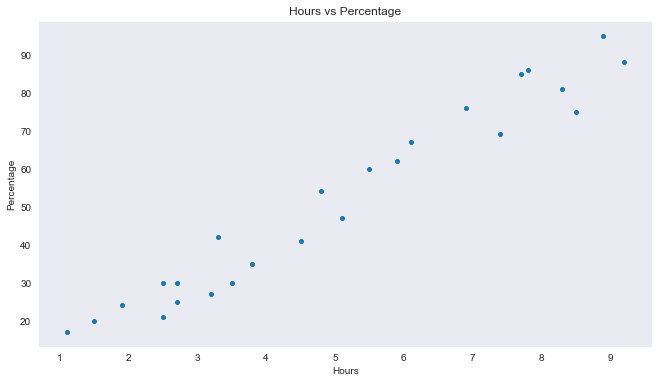

In [51]:
plt.figure(figsize=(11, 6))

sns.scatterplot(x='Hours', y='Scores', data= dataframe)
sns.set_style("dark")

plt.title('Hours vs Percentage')
plt.ylabel("Percentage")

From the above graph we can observe that the features and linearly related therefore we could apply logistic regression algorithm to this problem statement

# Preparing the data

### Spliting the data as X(Hours) and y(Percentage)

In [28]:
X = dataframe.iloc[:, :-1].values  
y = dataframe.iloc[:, 1].values  

### Splitting the Testing and Training Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the Model

In [30]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Finished Traning")

Finished Traning


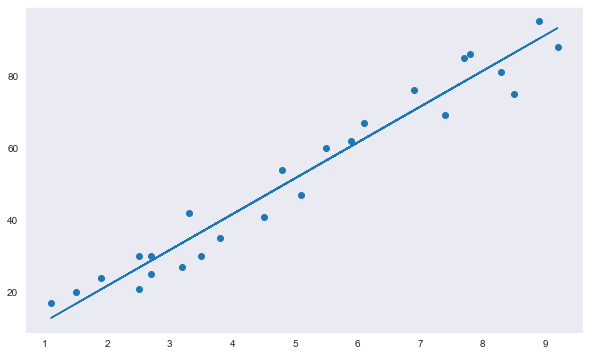

Slope  [9.91065648] 
Y-Intercept  2.018160041434683


In [53]:
line = regressor.coef_*X+regressor.intercept_

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

slope=regressor.coef_
interc=regressor.intercept_
print("Slope ",slope,"\nY-Intercept ",interc)

## Making Test Predictions

In [32]:
y_pred = regressor.predict(X_test)

In [33]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0, 0.5, 'Percentage Scored')

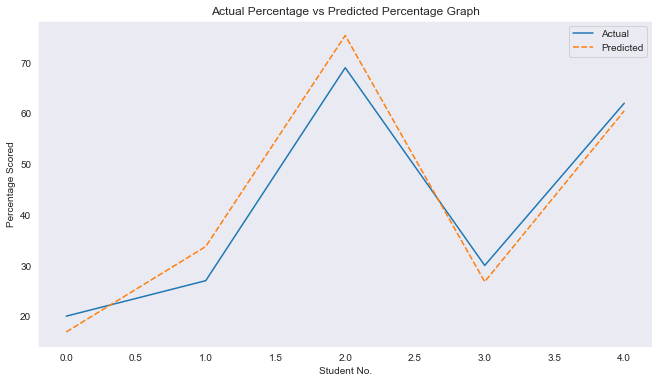

In [54]:
plt.figure(figsize=(11, 6))
sns.lineplot(data = df)
plt.title("Actual Percentage vs Predicted Percentage Graph")
plt.xlabel("Student No.")
plt.ylabel("Percentage Scored")

In [38]:
z = np.array([[9.25]])
hours = 9.25

In [56]:
own_pred = regressor.predict(z)
print("No of Hours = {}".format(hours))
print("Predicted Percentage = {}".format(own_pred[0]))

print("Predicted Percentage for ",hours," hrs is",own_pred[0])

No of Hours = 9.25
Predicted Percentage = 93.69173248737538
Predicted Percentage for  9.25  hrs is 93.69173248737538


## Evaluating the model

####  By R Square Method

In [46]:
r_square = regressor.score(X,y)
print(r_square)

0.9526947647057274


The best possible score is 1 which is obtained when the predicted values are the same as the actual values. The baseline model is 0. But in the worse case r square can even be negative

#### By Mean Absolute Error(MAE)

In [44]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

4.183859899002975


A low MSE value means that the predicted values match the real values.